In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Mean Squared Error: 0.40880669856459334


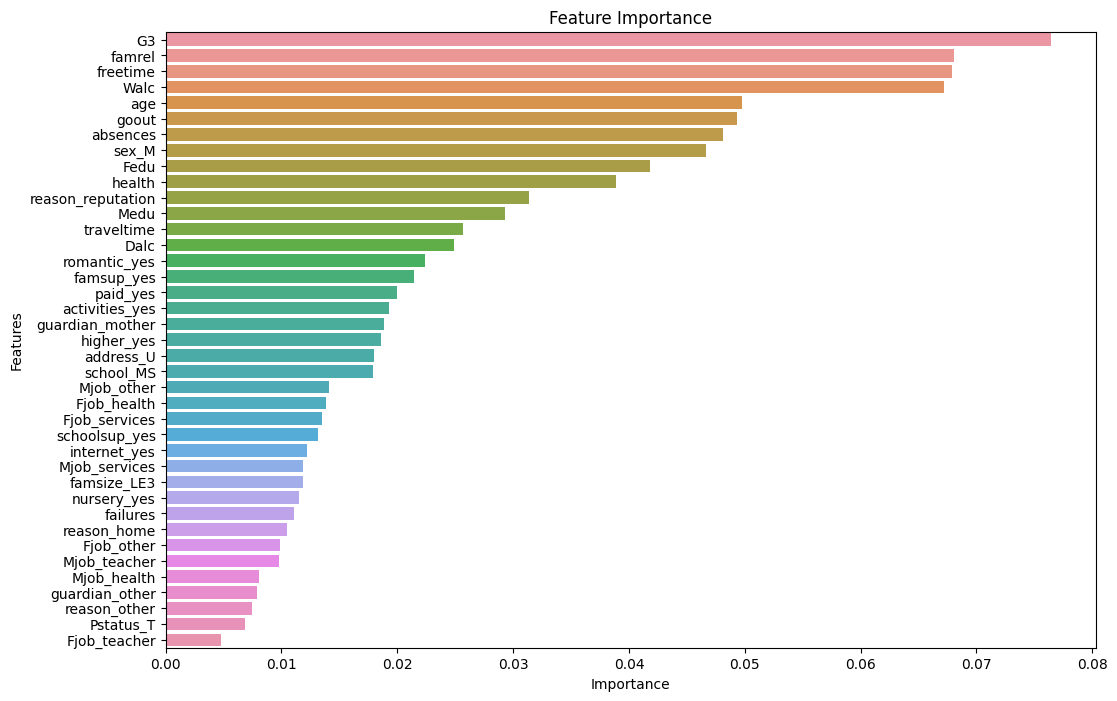

In [ ]:
data = pd.read_csv('student_data.csv', delimiter=';')

data = data.dropna()

data = data.drop(columns=['G1', 'G2'])

data = pd.get_dummies(data, drop_first=True)

X = data.drop('studytime', axis=1)
y = data['studytime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv('student_data.csv', delimiter=';')

binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                  'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for column in binary_columns:
    data[column] = pd.factorize(data[column])[0]

nominal_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

data.to_csv('preprocessed_student_data.csv', index=False)

print(data.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        0        0        0     4     4           2   
1       0    0   17        0        0        1     1     1           1   
2       0    0   15        0        1        1     1     1           1   
3       0    0   15        0        0        1     4     2           1   
4       0    0   16        0        0        1     3     3           1   

   studytime  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0          2  ...             0            0           0              0   
1          2  ...             0            0           1              0   
2          2  ...             0            0           1              0   
3          3  ...             0            0           0              1   
4          2  ...             0            0           1              0   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
0             1            0           

In [ ]:
import pandas as pd

df = pd.read_csv('student_data.csv', delimiter=';')

df.drop(columns=['G1', 'G2'], inplace=True)
df = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
correlation_matrix = df.corr()
relevant_features = correlation_matrix["G3"].sort_values(ascending=False)

In [ ]:
print(relevant_features)

G3                   1.000000
higher_yes           0.332172
school_GP            0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address_U            0.167637
internet_yes         0.150025
Mjob_teacher         0.134910
sex_F                0.129077
Fjob_teacher         0.125916
Mjob_health          0.101244
romantic_no          0.090583
schoolsup_no         0.066405
famrel               0.063361
activities_yes       0.059791
famsup_yes           0.059206
paid_no              0.054898
guardian_father      0.051030
reason_home          0.046537
famsize_LE3          0.045016
Fjob_health          0.039142
Mjob_services        0.038447
nursery_yes          0.028752
Pstatus_A            0.000754
Pstatus_T           -0.000754
guardian_mother     -0.004415
Fjob_other          -0.005301
nursery_no          -0.028752
Fjob_at_home        -0.038904
famsize_GT3         -0.045016
Fjob_services       -0.053204
paid_yes  

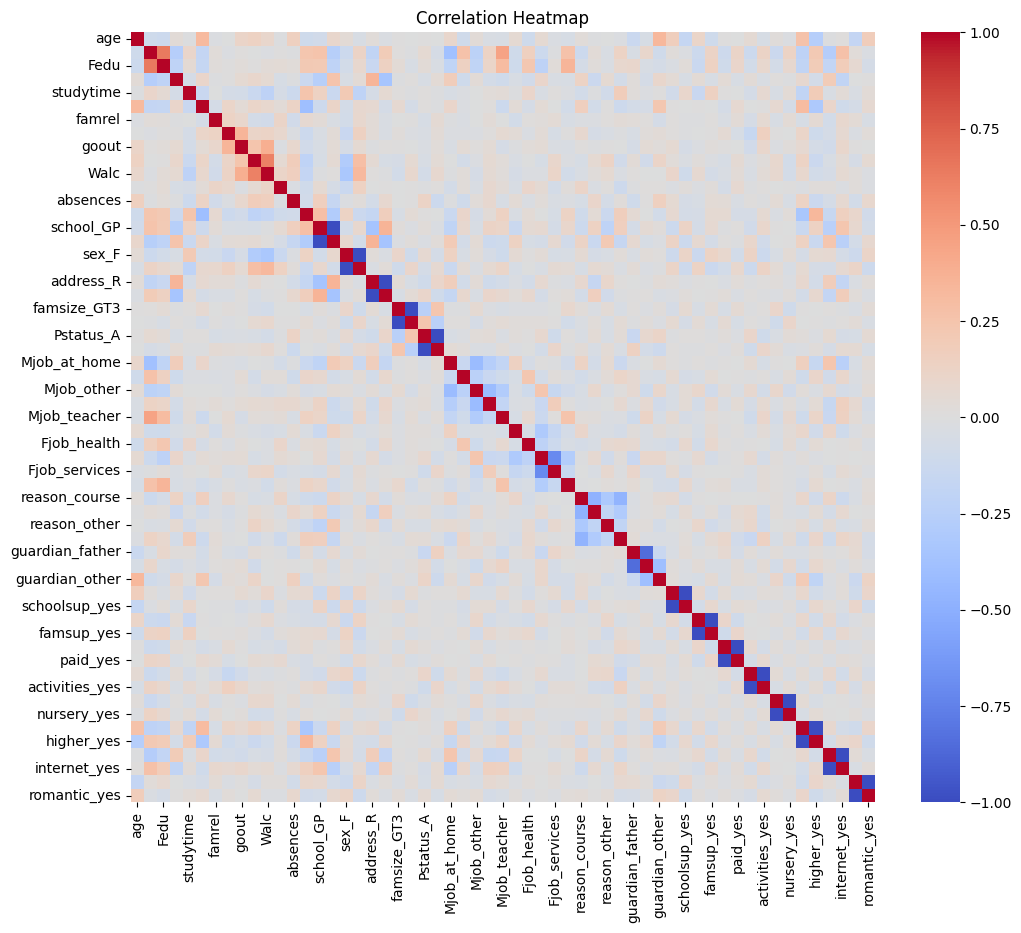

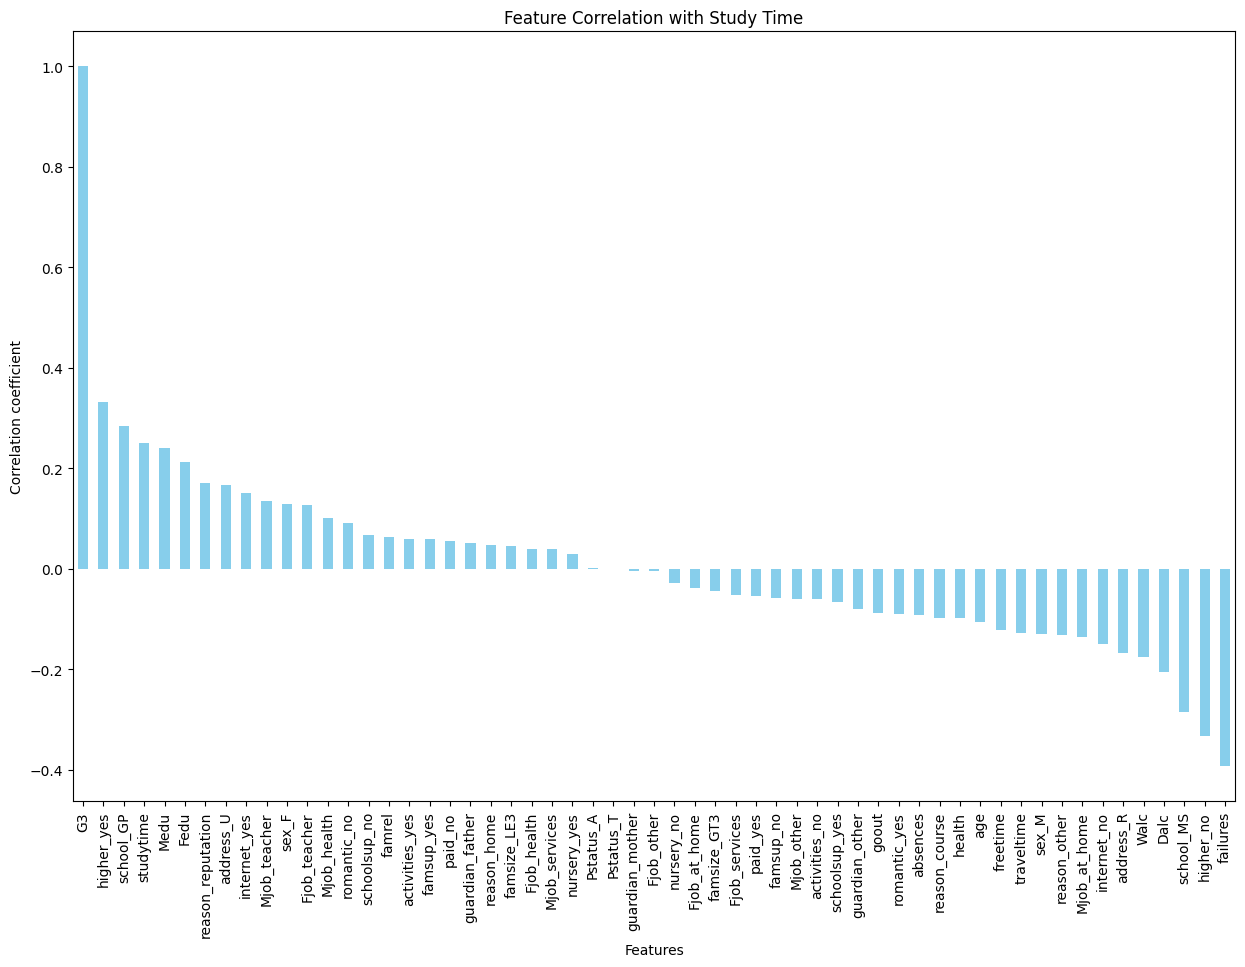

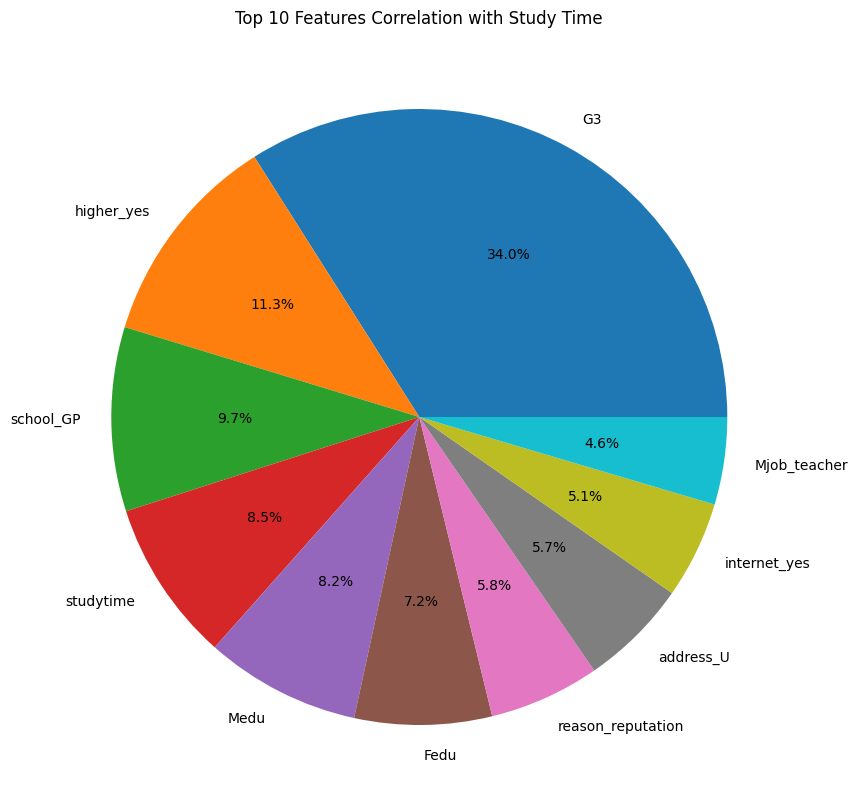

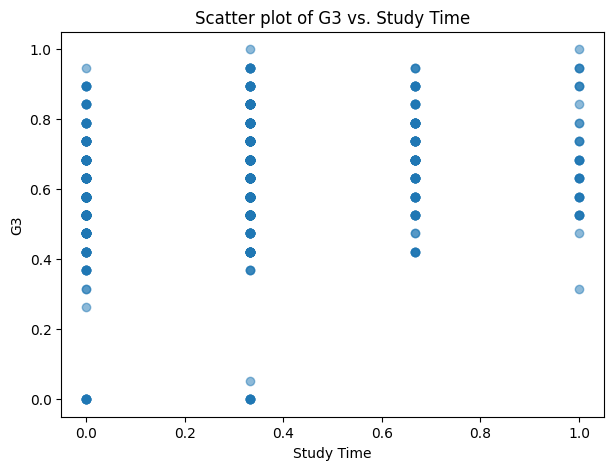

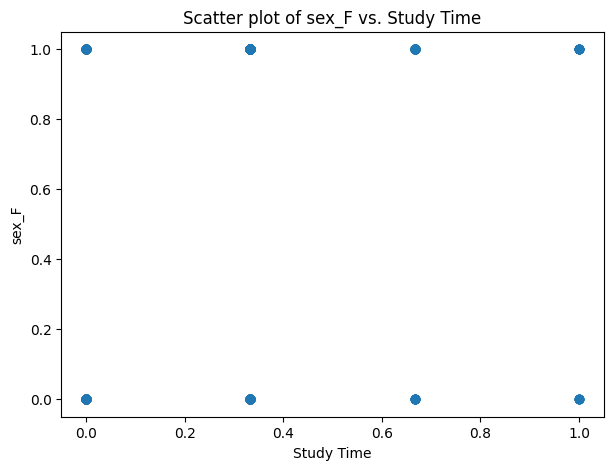

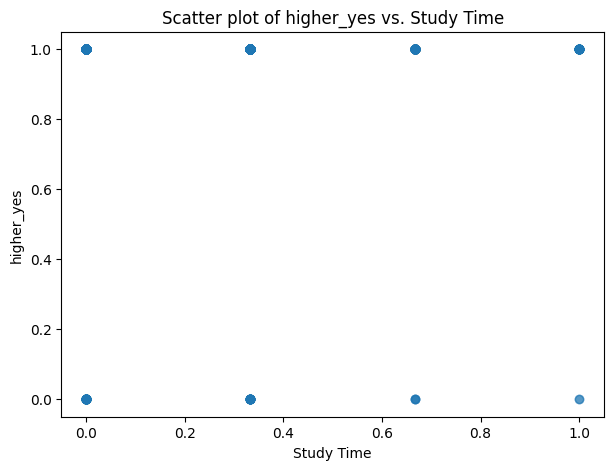

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 2. Bar Plot:
plt.figure(figsize=(15, 10))
relevant_features.plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Study Time')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.show()

# 3. Pie Chart for Top-N Features:
top_n = 10
top_features = relevant_features.head(top_n)
plt.figure(figsize=(10, 10))
top_features.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Top {top_n} Features Correlation with Study Time')
plt.ylabel('')  # Hide the 'studytime' label on y-axis
plt.show()

# 4. Scatter Plots for Top Few Features:
features_to_plot = ['G3', 'sex_F', 'higher_yes']
for feature in features_to_plot:
    plt.figure(figsize=(7, 5))
    plt.scatter(df['studytime'], df[feature], alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs. Study Time')
    plt.xlabel('Study Time')
    plt.ylabel(feature)
    plt.show()

In [ ]:
correlation_with_G3 = df.corr()["G3"].sort_values(ascending=False)
correlation_with_studytime = df.corr()["studytime"].sort_values(ascending=False)
print(correlation_with_G3)
print(correlation_with_studytime)

G3                   1.000000
higher_yes           0.332172
school_GP            0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address_U            0.167637
internet_yes         0.150025
Mjob_teacher         0.134910
sex_F                0.129077
Fjob_teacher         0.125916
Mjob_health          0.101244
romantic_no          0.090583
schoolsup_no         0.066405
famrel               0.063361
activities_yes       0.059791
famsup_yes           0.059206
paid_no              0.054898
guardian_father      0.051030
reason_home          0.046537
famsize_LE3          0.045016
Fjob_health          0.039142
Mjob_services        0.038447
nursery_yes          0.028752
Pstatus_A            0.000754
Pstatus_T           -0.000754
guardian_mother     -0.004415
Fjob_other          -0.005301
nursery_no          -0.028752
Fjob_at_home        -0.038904
famsize_GT3         -0.045016
Fjob_services       -0.053204
paid_yes  

In [ ]:
correlation_with_G3.drop('G3', inplace=True)
correlation_with_studytime.drop('studytime', inplace=True)

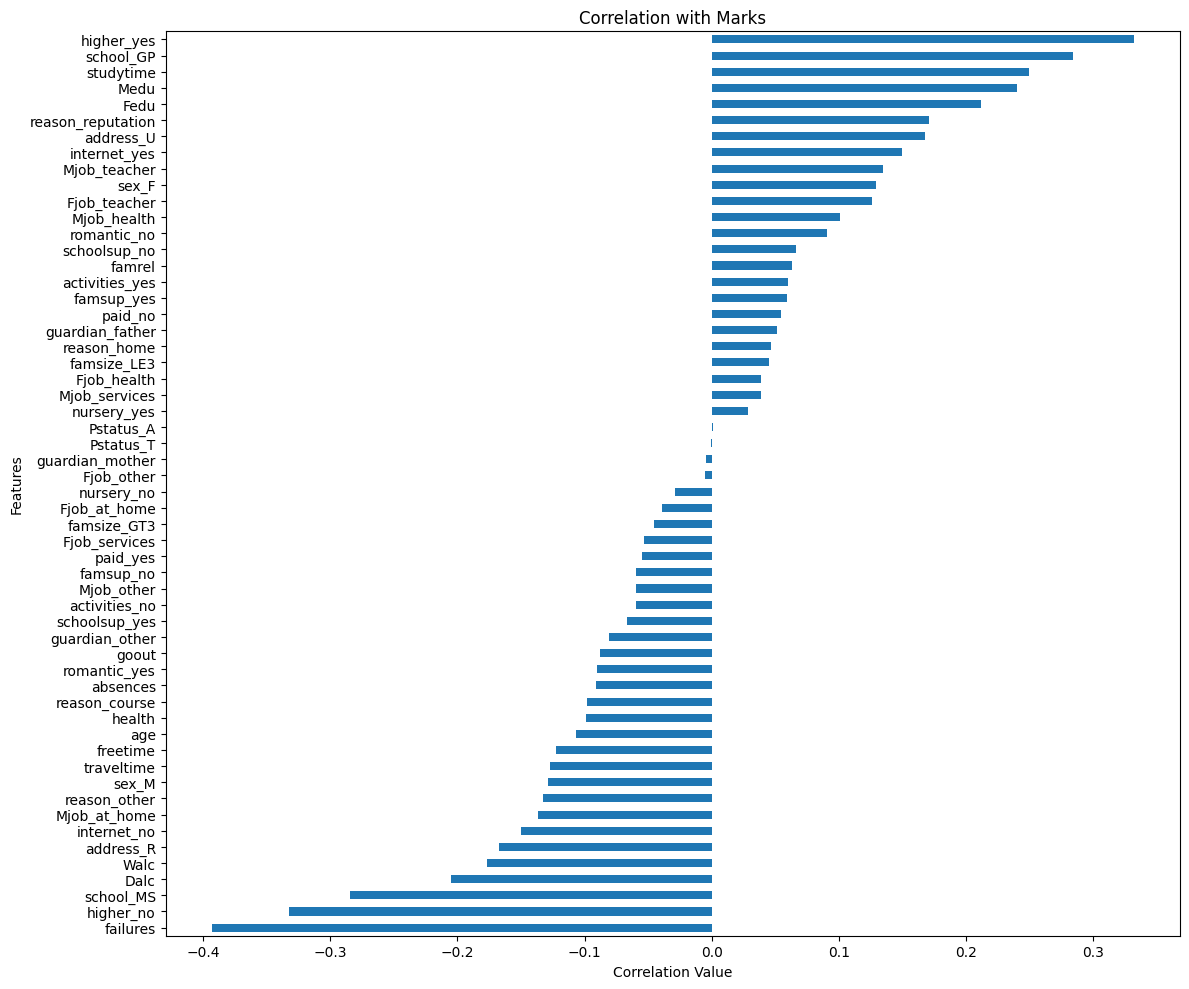

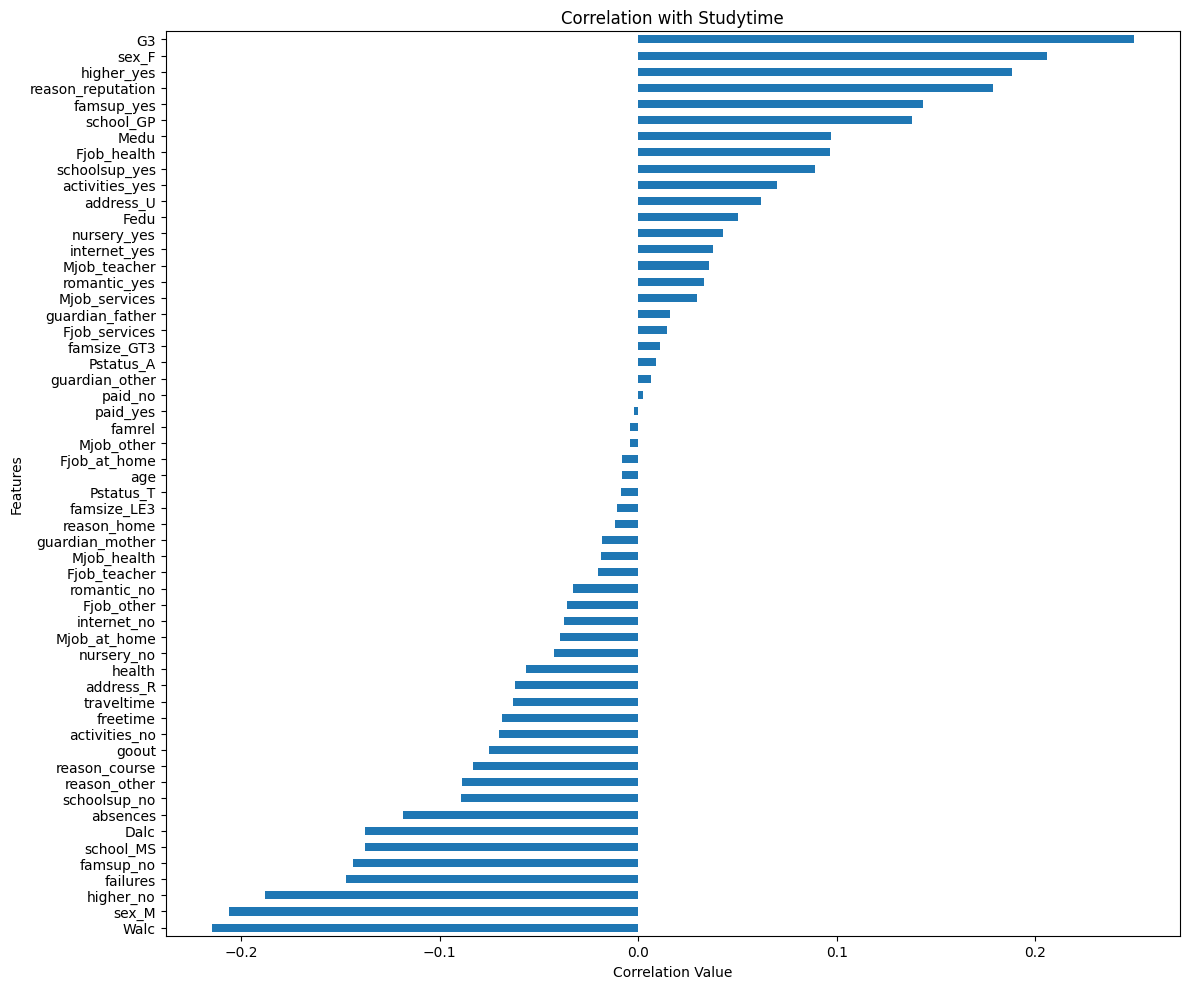

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for correlation with G1
plt.figure(figsize=(12, 10))
correlation_with_G3.sort_values().plot(kind='barh')
plt.title("Correlation with Marks")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Bar plot for correlation with studytime
plt.figure(figsize=(12, 10))
correlation_with_studytime.sort_values().plot(kind='barh')
plt.title("Correlation with Studytime")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
def assign_weights_better(correlation):
    if abs(correlation) >= 0.5:
        return 4
    elif abs(correlation) >= 0.3:
        return 3
    elif abs(correlation) >= 0.1:
        return 2
    else:
        return 1

weights_G3_better = {feature: assign_weights_better(correlation) for feature, correlation in correlation_with_G3.items()}
weights_studytime_better = {feature: assign_weights_better(correlation) for feature, correlation in correlation_with_studytime.items()}

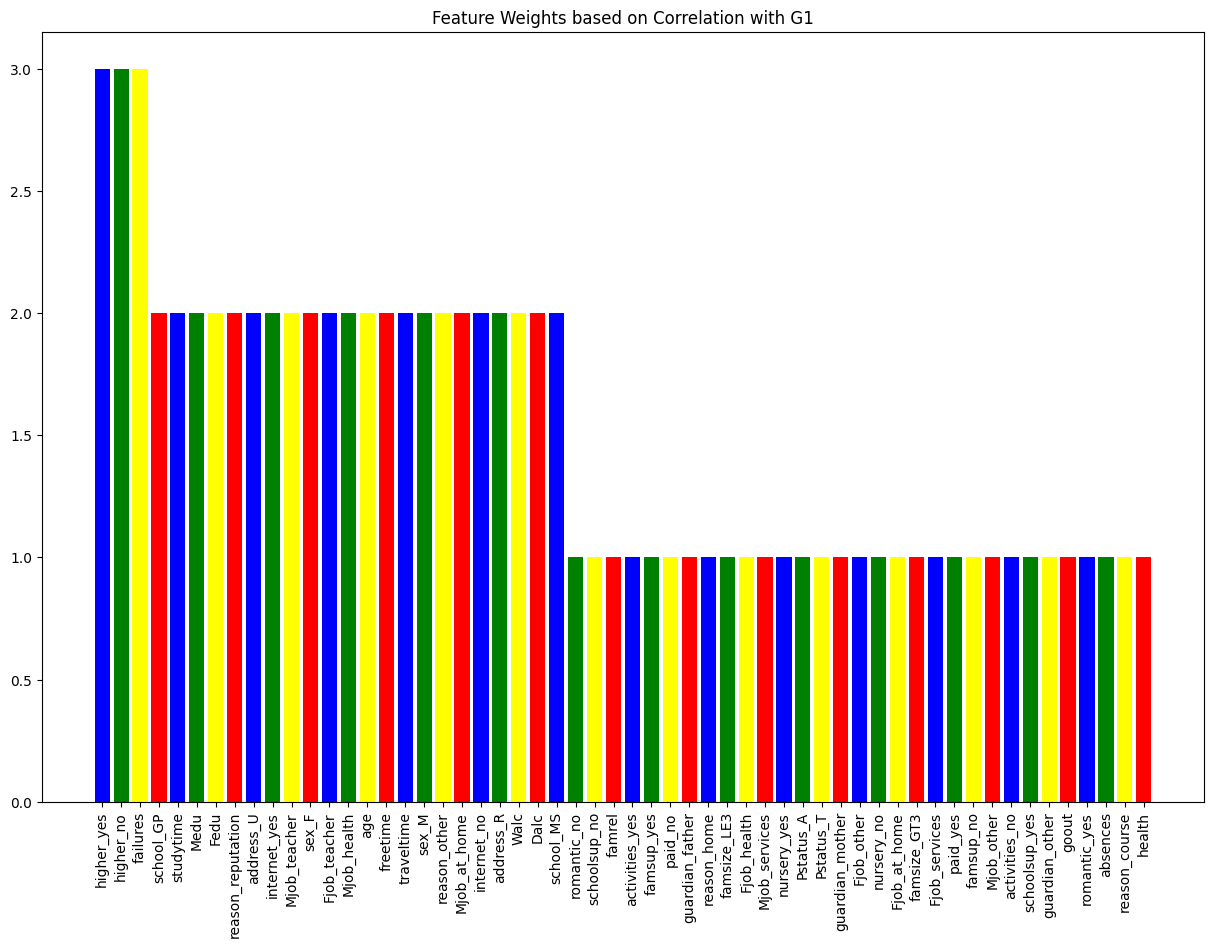

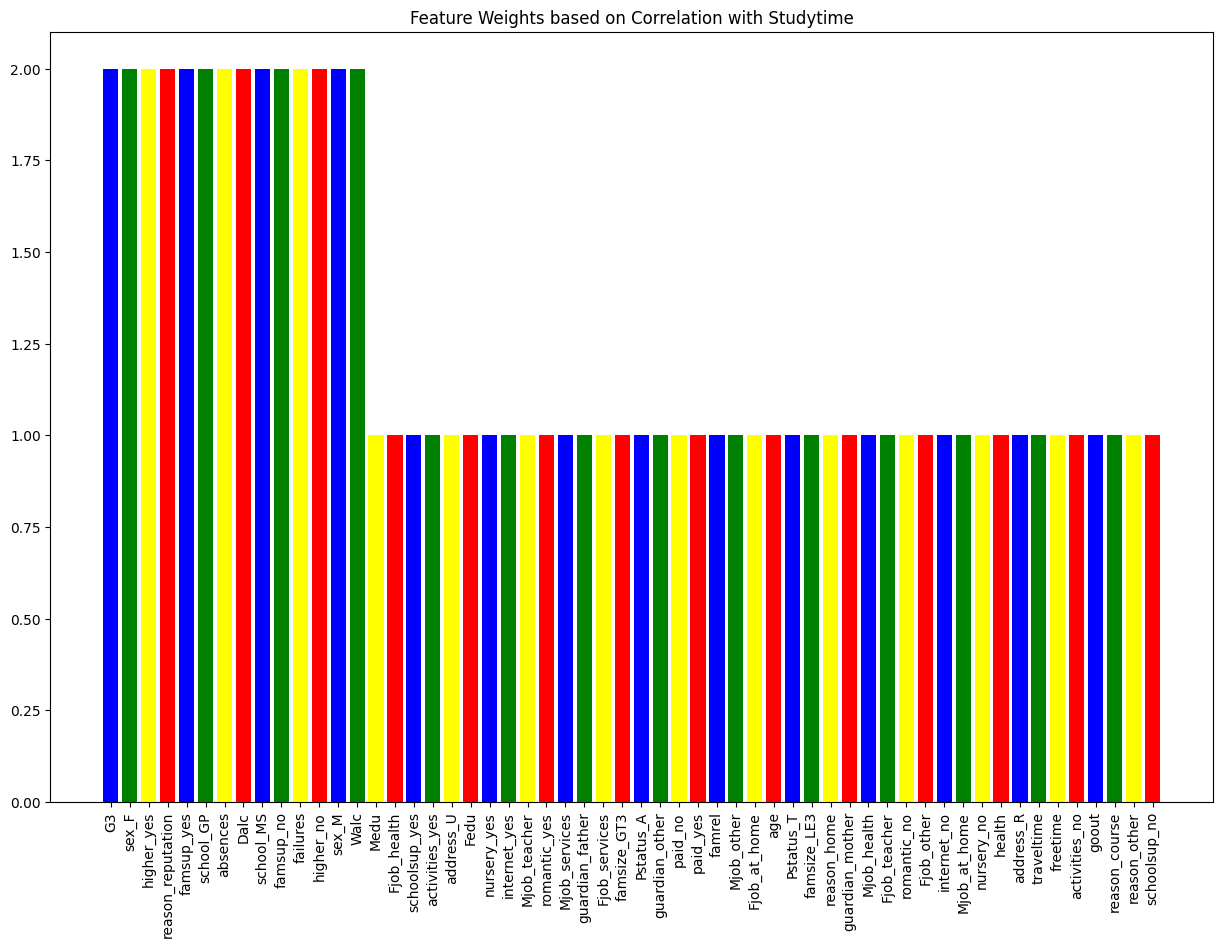

In [ ]:
import matplotlib.pyplot as plt

# Visualizing weights for G3
sorted_weights_G3 = dict(sorted(weights_G3_better.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15,10))
plt.bar(sorted_weights_G3.keys(), sorted_weights_G3.values(), color=['blue', 'green', 'yellow', 'red'])
plt.xticks(rotation=90)
plt.title('Feature Weights based on Correlation with G1')
plt.show()

# Visualizing weights for studytime
sorted_weights_studytime = dict(sorted(weights_studytime_better.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15,10))
plt.bar(sorted_weights_studytime.keys(), sorted_weights_studytime.values(), color=['blue', 'green', 'yellow', 'red'])
plt.xticks(rotation=90)
plt.title('Feature Weights based on Correlation with Studytime')
plt.show()

In [ ]:
def assign_dynamic_weights(correlation):
    return abs(correlation) * 100

weights_G3_dynamic = {feature: assign_dynamic_weights(correlation) for feature, correlation in correlation_with_G3.items()}
weights_studytime_dynamic = {feature: assign_dynamic_weights(correlation) for feature, correlation in correlation_with_studytime.items()}

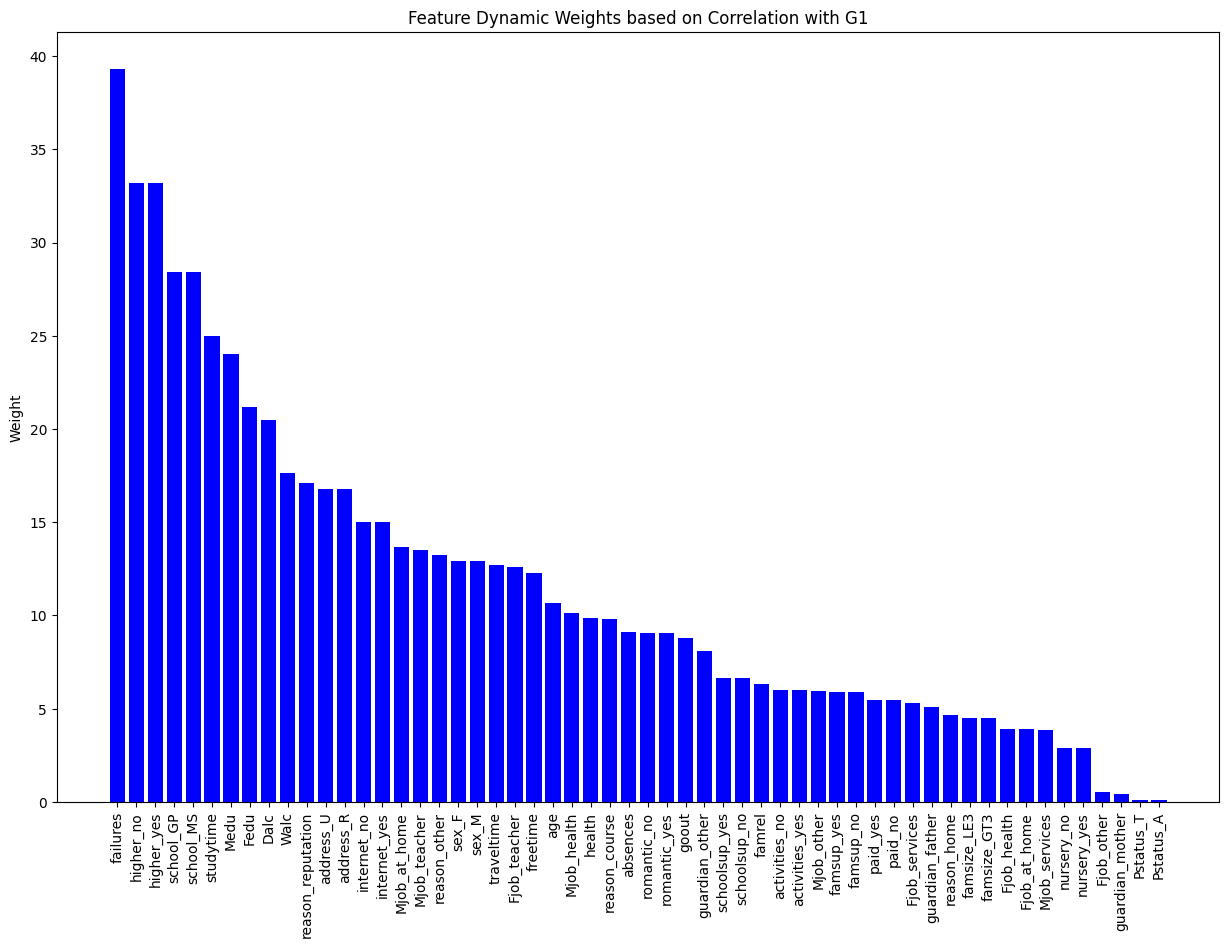

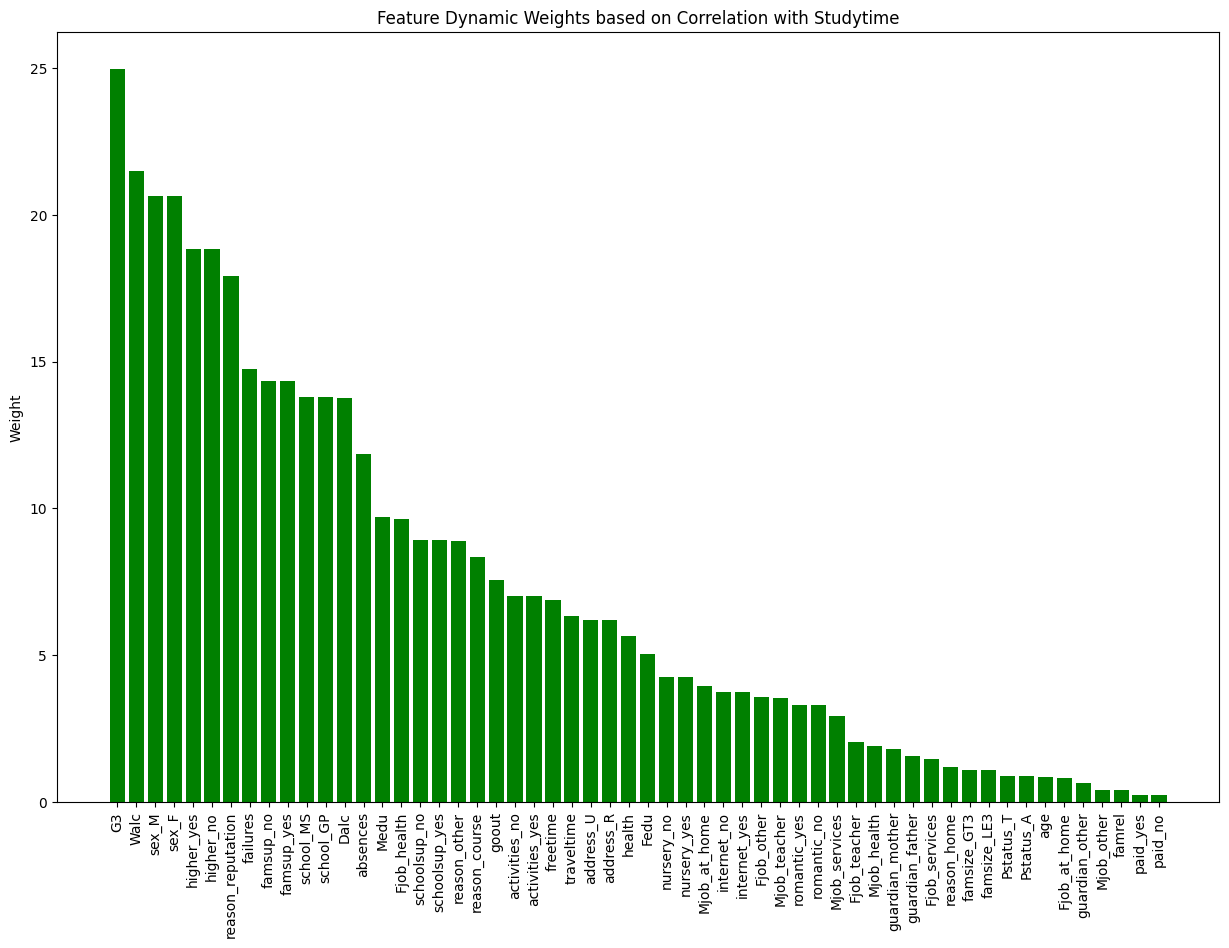

In [ ]:
import matplotlib.pyplot as plt

sorted_weights_G3_dynamic = dict(sorted(weights_G3_dynamic.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15,10))
plt.bar(sorted_weights_G3_dynamic.keys(), sorted_weights_G3_dynamic.values(), color='blue')
plt.xticks(rotation=90)
plt.title('Feature Dynamic Weights based on Correlation with G1')
plt.ylabel('Weight')
plt.show()

sorted_weights_studytime_dynamic = dict(sorted(weights_studytime_dynamic.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(15,10))
plt.bar(sorted_weights_studytime_dynamic.keys(), sorted_weights_studytime_dynamic.values(), color='green')
plt.xticks(rotation=90)
plt.title('Feature Dynamic Weights based on Correlation with Studytime')
plt.ylabel('Weight')
plt.show()

In [ ]:
def merge_weights(weights1, weights2):
    merged_weights = {}

    all_features = set(weights1.keys()) | set(weights2.keys())

    for feature in all_features:
        weight1 = weights1.get(feature, 0)
        weight2 = weights2.get(feature, 0)

        merged_weights[feature] = (weight1 + weight2) / 2

    return merged_weights

merged_weights = merge_weights(weights_G1_dynamic, weights_studytime_dynamic)

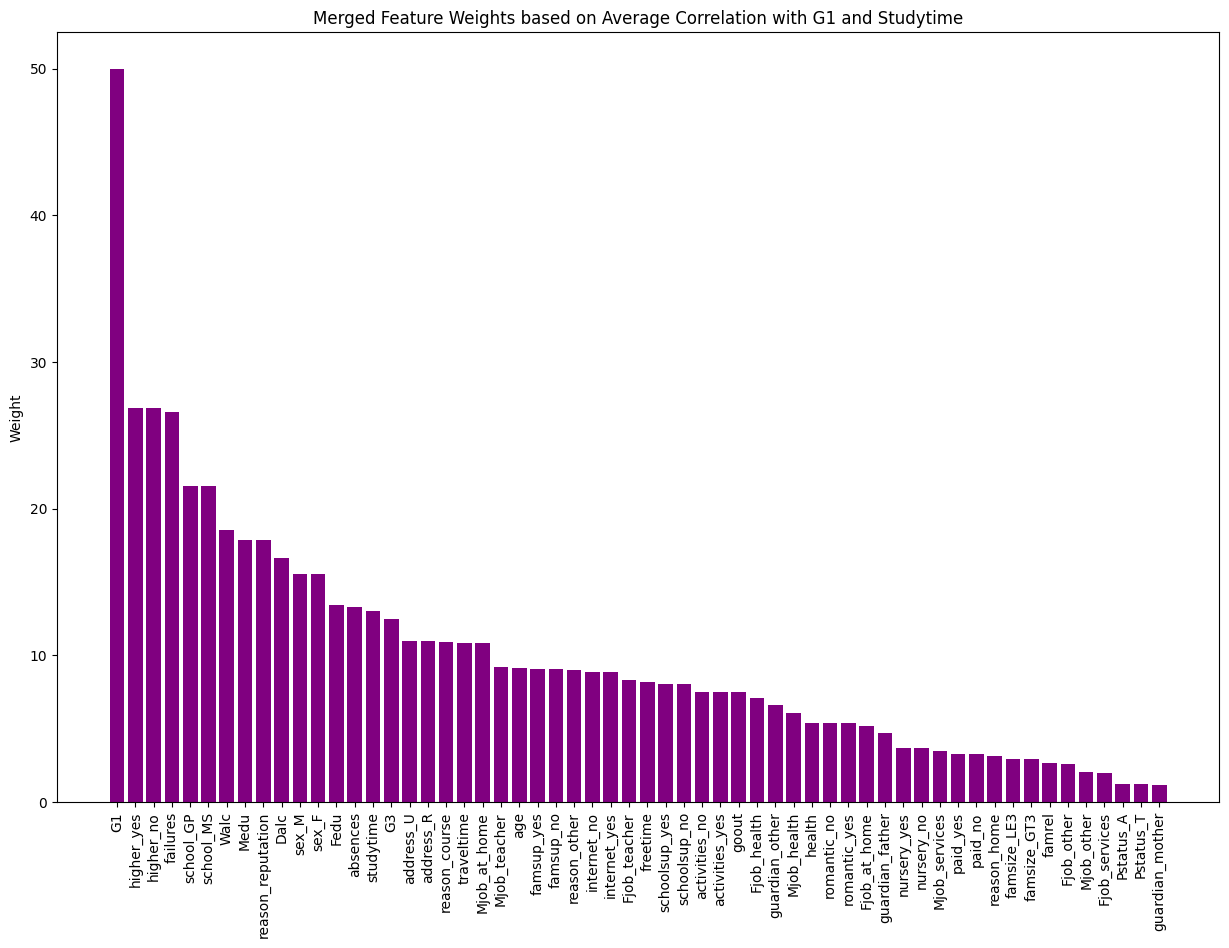

In [ ]:
import matplotlib.pyplot as plt

sorted_merged_weights = dict(sorted(merged_weights.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(15,10))
plt.bar(sorted_merged_weights.keys(), sorted_merged_weights.values(), color='purple')
plt.xticks(rotation=90)
plt.title('Merged Feature Weights based on Average Correlation with G1 and Studytime')
plt.ylabel('Weight')
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
data = pd.read_csv('student_data.csv', sep=';')

# Define grade categories
grade_categories = {'A': (16, 20), 'V': (12, 15), 'C': (8, 11), 'D': (4, 7), 'F': (0, 3)}

# Function to assign categories
def assign_grade_category(grade):
    for category, (low, high) in grade_categories.items():
        if low <= grade <= high:
            return category
    return 'F'

data['G3'] = data['G3'].apply(assign_grade_category)
grade_mapping = {category: idx for idx, category in enumerate(grade_categories.keys())}
data['G3'] = data['G3'].map(grade_mapping)

# One-hot encoding and scaling
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object', 'bool']).columns, drop_first=True)
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('G3')
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Define target and features
X = data.drop('G3', axis=1)
y = data['G3']

# Neural Network needs categorical labels
y_nn = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y_nn, test_size=0.2, random_state=0)

# Neural Network with TensorFlow/Keras
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(grade_categories), activation='softmax')
])

model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate models (excluding Neural Network)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "GBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracies[name] = model.score(X_test, y_test)  # Store accuracy

# Train and evaluate Neural Network with TensorFlow/Keras
model_nn.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, validation_split=0.2)
_, accuracy_nn = model_nn.evaluate(X_test_nn, y_test_nn)
accuracies["Neural Network (Keras)"] = accuracy_nn

y_pred_nn = model_nn.predict(X_test_nn)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)
y_test_nn_labels = np.argmax(y_test_nn, axis=1)
print("Neural Network Classification Report:\n")
print(classification_report(y_test_nn_labels, y_pred_nn_labels))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 41
[LightGBM] [Info] Start training from score -2.112311
[LightGBM] [Info] Start training from score -0.994090
[LightGBM] [Info] Start training from score -0.878107
[LightGBM] [Info] Start training from score -3.230924
[LightGBM] [Info] Start training from score -2.920769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

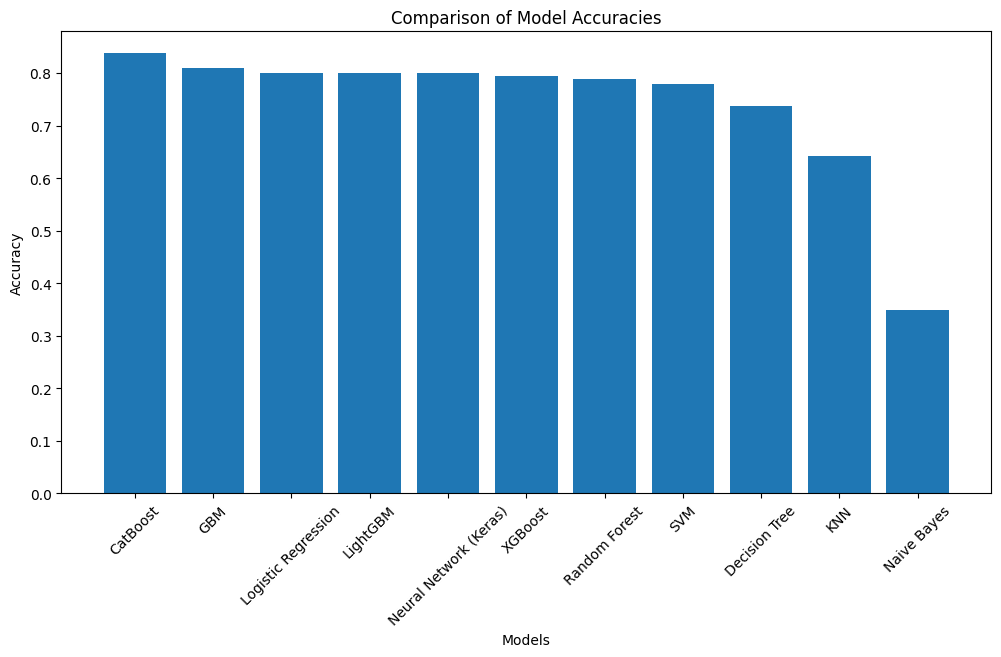

In [ ]:
import matplotlib.pyplot as plt

# Sort accuracies for better visualization
accuracies_sorted = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(accuracies_sorted)), list(accuracies_sorted.values()), align='center')
plt.xticks(range(len(accuracies_sorted)), list(accuracies_sorted.keys()), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 41
[LightGBM] [Info] Start training from score -2.112311
[LightGBM] [Info] Start training from score -0.994090
[LightGBM] [Info] Start training from score -0.878107
[LightGBM] [Info] Start training from score -3.230924
[LightGBM] [Info] Start training from score -2.920769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

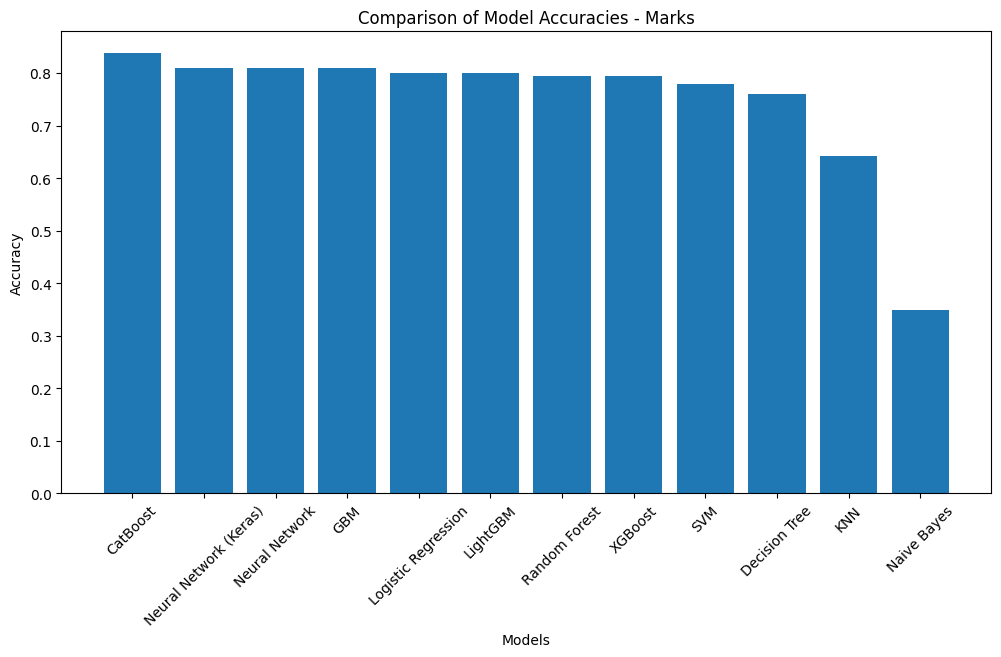

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('student_data.csv', sep=';')

grade_categories = {'A': (16, 20), 'V': (12, 15), 'C': (8, 11), 'D': (4, 7), 'F': (0, 3)}

def assign_grade_category(grade):
    for category, (low, high) in grade_categories.items():
        if low <= grade <= high:
            return category
    return 'F'

data['G3'] = data['G3'].apply(assign_grade_category)
grade_mapping = {category: idx for idx, category in enumerate(grade_categories.keys())}
data['G3'] = data['G3'].map(grade_mapping)

data = pd.get_dummies(data, columns=data.select_dtypes(include=['object', 'bool']).columns, drop_first=True)
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('G3')
data[numeric_features] = scaler.fit_transform(data[numeric_features])

X = data.drop('G3', axis=1)
y = data['G3']

y_nn = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y_nn, test_size=0.2, random_state=0)

model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(grade_categories), activation='softmax')  # Adjusted to match the number of classes
])

model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

accuracies = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000),
    "GBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracies[name] = model.score(X_test, y_test)

model_nn.fit(X_train_nn, y_train_nn, epochs=12, batch_size=32, validation_split=0.2)
_, accuracy_nn = model_nn.evaluate(X_test_nn, y_test_nn)
accuracies["Neural Network (Keras)"] = accuracy_nn

y_pred_nn = model_nn.predict(X_test_nn)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)
y_test_nn_labels = np.argmax(y_test_nn, axis=1)

print("Neural Network Classification Report:\n")
print(classification_report(y_test_nn_labels, y_pred_nn_labels))  # Corrected this line

accuracies_sorted = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
plt.bar(range(len(accuracies_sorted)), list(accuracies_sorted.values()), align='center')
plt.xticks(range(len(accuracies_sorted)), list(accuracies_sorted.keys()), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies - Marks')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

data = pd.read_csv('student_data.csv', sep=';')
data = data.drop(columns=['G1', 'G2', 'G3'])

X = data.drop('studytime', axis=1)
y = data['studytime']

X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'bool']).columns, drop_first=True)

scaler = StandardScaler()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_features] = scaler.fit_transform(X[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train))
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output units match the number of classes
])
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

accuracies = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "GBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    accuracy = model.score(X_test, y_test_encoded)
    accuracies[name] = accuracy

model_nn.fit(X_train, y_train_encoded, epochs=12, batch_size=32, validation_split=0.2)
_, accuracy_nn = model_nn.evaluate(X_test, y_test_encoded)
accuracies["Neural Network (Keras)"] = accuracy_nn

for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

y_pred_nn = model_nn.predict(X_test)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)

print("Neural Network Classification Report:\n")
print(classification_report(y_test_encoded, y_pred_nn_labels))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 38
[LightGBM] [Info] Start training from score -1.186168
[LightGBM] [Info] Start training from score -0.774188
[LightGBM] [Info] Start training from score -1.771605
[LightGBM] [Info] Start training from score -2.757140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

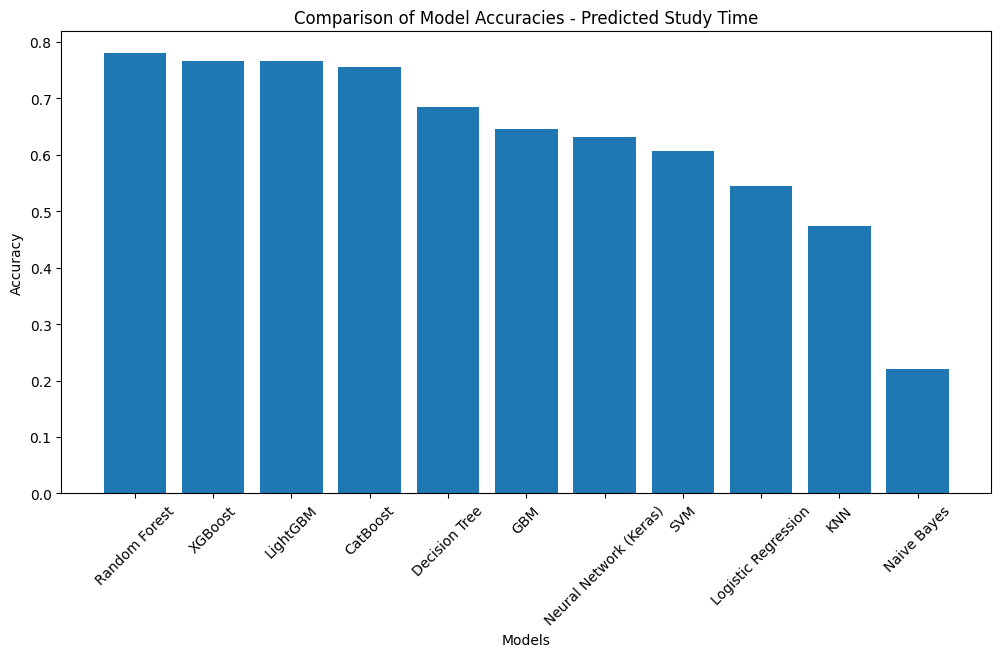

In [ ]:
accuracies_sorted = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(range(len(accuracies_sorted)), list(accuracies_sorted.values()), align='center')
plt.xticks(range(len(accuracies_sorted)), list(accuracies_sorted.keys()), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies - PredictingStudy Time (Using No Grade Data)')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 15
[LightGBM] [Info] Start training from score -1.170604
[LightGBM] [Info] Start training from score -0.738470
[LightGBM] [Info] Start training from score -1.852234
[LightGBM] [Info] Start training from score -2.898790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

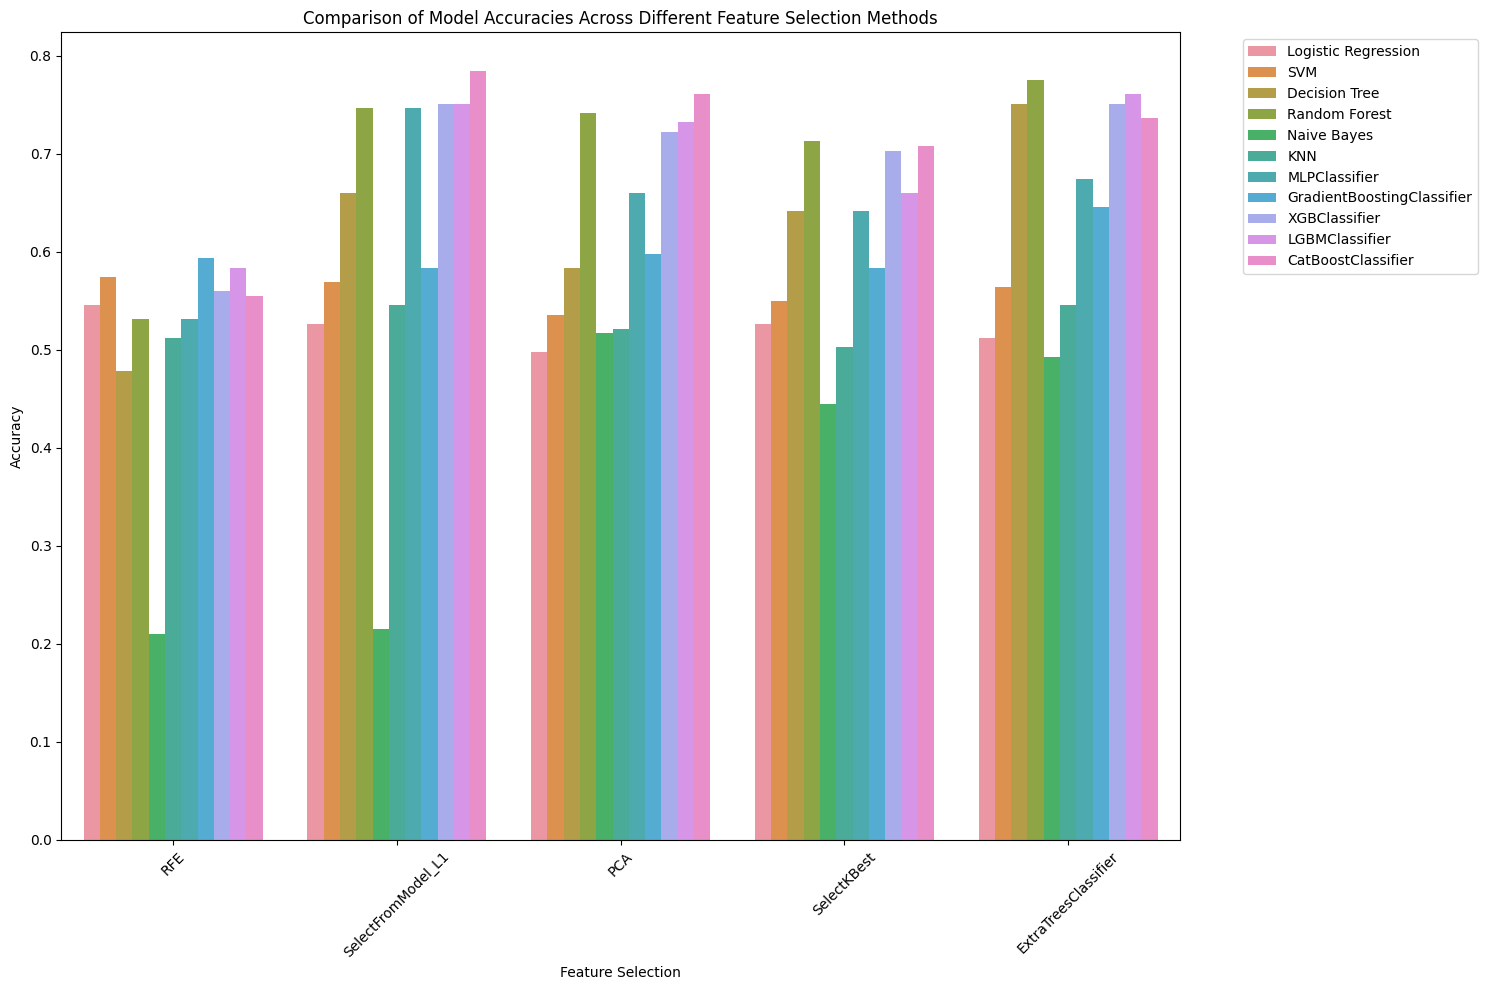

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('student_data.csv', sep=';')
data = data.drop(columns=['G1', 'G2', 'G3'])

binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('num', numeric_transformer, numeric_columns)
    ]
)

X = data.drop('studytime', axis=1)
y = data['studytime'] - 1

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoostClassifier": CatBoostClassifier(verbose=0)
}

feature_selection_methods = {
    "RFE": RFE(estimator=SVC(kernel="linear"), n_features_to_select=15),
    "SelectFromModel_L1": SelectFromModel(Lasso(alpha=0.01)),
    "PCA": PCA(n_components=15),
    "SelectKBest": SelectKBest(score_func=f_classif, k=15),
    "ExtraTreesClassifier": SelectFromModel(ExtraTreesClassifier(n_estimators=50)),
}

results = []

for fs_name, fs_method in feature_selection_methods.items():
    X_train_transformed = fs_method.fit_transform(X_train, y_train)
    X_test_transformed = fs_method.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_transformed, y_train)
        accuracy = model.score(X_test_transformed, y_test)
        results.append({"Feature Selection": fs_name, "Model": model_name, "Accuracy": accuracy})

results_df = pd.DataFrame(results)

plt.figure(figsize=(15, 10))
sns.barplot(x="Feature Selection", y="Accuracy", hue="Model", data=results_df)
plt.xticks(rotation=45)
plt.title('Comparison of Model Accuracies Across Different Feature Selection Methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('student_data.csv', sep=';')
data = data.drop(columns=['school', 'G1', 'G2'])

# Columns
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'studytime']

# Binary columns transformation
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

# Nominal columns transformation
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Numeric columns transformation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('num', numeric_transformer, numeric_columns)
    ]
)

# Prepare features and target
X = data.drop('G3', axis=1)
y = data['G3']

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Feature Selection and Model
feature_selection_model = SelectFromModel(Lasso(alpha=0.01))
model = Pipeline([
    ('feature_selection', feature_selection_model),
    ('regressor', RandomForestRegressor())
])

# Train the model
model.fit(X_train, y_train)

def get_user_input():
    user_data = {}
    prompt_messages = {
        'sex': "Enter sex ('F' for female or 'M' for male): ",
        'age': "Enter age (numeric, from 15 to 22): ",
        'address': "Enter address type ('U' for urban or 'R' for rural): ",
        'famsize': "Enter family size ('LE3' for less or equal to 3 or 'GT3' for greater than 3): ",
        'Pstatus': "Enter parent's cohabitation status ('T' for living together or 'A' for apart): ",
        'Medu': "Enter mother's education (0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education): ",
        'Fedu': "Enter father's education (0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education): ",
        'Mjob': "Enter mother's job ('teacher', 'health', 'services', 'at_home', 'other'): ",
        'Fjob': "Enter father's job ('teacher', 'health', 'services', 'at_home', 'other'): ",
        'reason': "Enter reason to choose school ('home' - close to home, 'reputation' - school reputation, 'course' - course preference, 'other'): ",
        'guardian': "Enter student's guardian ('mother', 'father', 'other'): ",
        'traveltime': "Enter travel time to school (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, 4 - >1 hour): ",
        'studytime': "Enter weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours): ",
        'failures': "Enter number of past class failures (n if 1<=n<3, else 4): ",
        'schoolsup': "Need extra educational support? ('yes' or 'no'): ",
        'famsup': "Have family educational support? ('yes' or 'no'): ",
        'paid': "Extra paid classes within course subject? ('yes' or 'no'): ",
        'activities': "Participate in extra-curricular activities? ('yes' or 'no'): ",
        'nursery': "Attended nursery school? ('yes' or 'no'): ",
        'higher': "Wants to take higher education? ('yes' or 'no'): ",
        'internet': "Access to Internet at home? ('yes' or 'no'): ",
        'romantic': "In a romantic relationship? ('yes' or 'no'): ",
        'famrel': "Quality of family relationships (1 - very bad to 5 - excellent): ",
        'freetime': "Free time after school (1 - very low to 5 - very high): ",
        'goout': "Going out with friends (1 - very low to 5 - very high): ",
        'Dalc': "Workday alcohol consumption (1 - very low to 5 - very high): ",
        'Walc': "Weekend alcohol consumption (1 - very low to 5 - very high): ",
        'health': "Current health status (1 - very bad to 5 - very good): ",
        'absences': "Number of school absences (numeric, from 0 to 93): ",
        'G1': "Normalise your grade (numeric, from 1 to 20)"
    }

    for column in binary_columns + nominal_columns + numeric_columns:
        user_input = input(prompt_messages[column]).strip()
        if user_input.lower() == 'na' or user_input == '':
            user_data[column] = None
        else:
            if column in numeric_columns:
                try:
                    user_data[column] = float(user_input)
                except ValueError:
                    print(f"Invalid input for {column}. Please enter a number.")
                    return None
            else:
                user_data[column] = user_input

    return user_data


def recommend_study_time_change(current_study_time, predicted_grade, desired_grade):
    # Logic to recommend study time change
    # This part can be customized based on your specific criteria
    if predicted_grade < desired_grade:
        return "Increase study time"
    elif predicted_grade > desired_grade:
        return "Decrease study time"
    else:
        return "Maintain current study time"

# Get user input
user_data = get_user_input()

# Preprocess user data, excluding 'current_studytime' and 'desired_grade' from the model input
model_input_data = {k: v for k, v in user_data.items() if k not in ['current_studytime', 'desired_grade']}
model_input_df = pd.DataFrame([model_input_data])
model_input_processed = preprocessor.transform(model_input_df)

# Predict using the model
predicted_grade = model.predict(model_input_processed)[0]
print(f"Predicted Final Grade: {predicted_grade}")

# Recommend study time change
recommendation = recommend_study_time_change(
    user_data['current_studytime'],
    predicted_grade,
    user_data['desired_grade']
)
print(recommendation)

Enter sex ('F' for female or 'M' for male): M
Enter address type ('U' for urban or 'R' for rural): U
Enter family size ('LE3' for less or equal to 3 or 'GT3' for greater than 3): LE3
Enter parent's cohabitation status ('T' for living together or 'A' for apart): T
Need extra educational support? ('yes' or 'no'): yes
Have family educational support? ('yes' or 'no'): no
Extra paid classes within course subject? ('yes' or 'no'): no
Participate in extra-curricular activities? ('yes' or 'no'): no
Attended nursery school? ('yes' or 'no'): yes
Wants to take higher education? ('yes' or 'no'): yes
Access to Internet at home? ('yes' or 'no'): yes
In a romantic relationship? ('yes' or 'no'): no
Enter mother's job ('teacher', 'health', 'services', 'at_home', 'other'): at_home
Enter father's job ('teacher', 'health', 'services', 'at_home', 'other'): teacher
Enter reason to choose school ('home' - close to home, 'reputation' - school reputation, 'course' - course preference, 'other'): repuation
Enter

KeyError: ignored

In [ ]:
def get_user_input(use_hardcoded_values=False):
    user_data = {}
    prompt_messages = {
        # Add prompt messages for each feature here
        'sex': "Enter sex ('F' for female or 'M' for male): ",
        'age': "Enter age (numeric, from 15 to 22): ",
        'address': "Enter address type ('U' for urban or 'R' for rural): ",
        'famsize': "Enter family size ('LE3' for less or equal to 3 or 'GT3' for greater than 3): ",
        'Pstatus': "Enter parent's cohabitation status ('T' for living together or 'A' for apart): ",
        'Medu': "Enter mother's education (0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education): ",
        'Fedu': "Enter father's education (0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education): ",
        'Mjob': "Enter mother's job ('teacher', 'health', 'services', 'at_home', 'other'): ",
        'Fjob': "Enter father's job ('teacher', 'health', 'services', 'at_home', 'other'): ",
        'reason': "Enter reason to choose school ('home' - close to home, 'reputation' - school reputation, 'course' - course preference, 'other'): ",
        'guardian': "Enter student's guardian ('mother', 'father', 'other'): ",
        'traveltime': "Enter travel time to school (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, 4 - >1 hour): ",
        'studytime': "Enter weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours): ",
        'failures': "Enter number of past class failures (n if 1<=n<3, else 4): ",
        'schoolsup': "Need extra educational support? ('yes' or 'no'): ",
        'famsup': "Have family educational support? ('yes' or 'no'): ",
        'paid': "Extra paid classes within course subject? ('yes' or 'no'): ",
        'activities': "Participate in extra-curricular activities? ('yes' or 'no'): ",
        'nursery': "Attended nursery school? ('yes' or 'no'): ",
        'higher': "Wants to take higher education? ('yes' or 'no'): ",
        'internet': "Access to Internet at home? ('yes' or 'no'): ",
        'romantic': "In a romantic relationship? ('yes' or 'no'): ",
        'famrel': "Quality of family relationships (1 - very bad to 5 - excellent): ",
        'freetime': "Free time after school (1 - very low to 5 - very high): ",
        'goout': "Going out with friends (1 - very low to 5 - very high): ",
        'Dalc': "Workday alcohol consumption (1 - very low to 5 - very high): ",
        'Walc': "Weekend alcohol consumption (1 - very low to 5 - very high): ",
        'health': "Current health status (1 - very bad to 5 - very good): ",
        'absences': "Number of school absences (numeric, from 0 to 93): ",
        'G1': "Normalise your grade (numeric, from 1 to 20)",
        'desired_grade': "Enter the grade you want to achieve: "
    }

    if use_hardcoded_values:
        hardcoded_values = {
            'sex': 'M',
            'age': 20,
            'address': 'U',
            'famsize': 'LE3',
            'Pstatus': 'T',
            'Medu': 4,
            'Fedu': 4,
            'Mjob': 'at_home',
            'Fjob': 'teacher',
            'reason': 'reputation',
            'guardian': 'mother',
            'traveltime': 1,
            'studytime': 2,
            'failures': 0,
            'schoolsup': 'yes',
            'famsup': 'no',
            'paid': 'no',
            'activities': 'yes',
            'nursery': 'yes',
            'higher': 'yes',
            'internet': 'yes',
            'romantic': 'no',
            'famrel': 4,
            'freetime': 4,
            'goout': 4,
            'Dalc': 2,
            'Walc': 3,
            'health': 4,
            'absences': 0,
            'G1': 14,
            'desired_grade': 10
        }
        user_data.update(hardcoded_values)
    else:
        for key, prompt in prompt_messages.items():
            user_input = input(prompt).strip()
            if user_input.lower() == 'na' or user_input == '':
                user_data[key] = None
            else:
                user_data[key] = float(user_input) if key in numeric_columns + ['desired_grade', 'studytime'] else user_input

    return user_data

# Get user input using hardcoded values
user_data = get_user_input(use_hardcoded_values=True)

# Print the user input
print(user_data)

{'sex': 'M', 'age': 20, 'address': 'U', 'famsize': 'LE3', 'Pstatus': 'T', 'Medu': 4, 'Fedu': 4, 'Mjob': 'at_home', 'Fjob': 'teacher', 'reason': 'reputation', 'guardian': 'mother', 'traveltime': 1, 'studytime': 2, 'failures': 0, 'schoolsup': 'yes', 'famsup': 'no', 'paid': 'no', 'activities': 'yes', 'nursery': 'yes', 'higher': 'yes', 'internet': 'yes', 'romantic': 'no', 'famrel': 4, 'freetime': 4, 'goout': 4, 'Dalc': 2, 'Walc': 3, 'health': 4, 'absences': 0, 'G1': 14, 'desired_grade': 10}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('student_data.csv', sep=';')
data = data.drop(columns=['G1', 'G2', 'school'])

binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('num', numeric_transformer, numeric_columns)
    ]
)


X = data.drop('studytime', axis=1)
y = data['studytime'] - 1

X_processed = preprocessor.fit_transform(X)

models = {
    "Decision Tree": DecisionTreeClassifier(),
}

feature_selection_methods = {
    "SelectFromModel_L1": SelectFromModel(Lasso(alpha=0.01)),
}

results = []

for fs_name, fs_method in feature_selection_methods.items():
    X_transformed = fs_method.fit_transform(X_processed, y)

    for model_name, model in models.items():
        model.fit(X_transformed, y)


user_data = get_user_input(use_hardcoded_values=True)

current_study_time = user_data['studytime']
grade_dif = user_data['desired_grade'] - user_data['G1']
user_data.pop('studytime', None)
user_data.pop('G1', None)

user_data['G3'] = user_data.pop('desired_grade')

selected_features_model = 'None'

for fs_name, fs_method in feature_selection_methods.items():
    X_transformed = fs_method.fit_transform(X_processed, y)
    selected_features_model = fs_method

    for model_name, model in models.items():
        model.fit(X_transformed, y)

def predict_study_time(user_data, model, preprocessor, fs_model):
    user_data_df = pd.DataFrame([user_data])
    user_data_processed = preprocessor.transform(user_data_df)

    user_data_selected = fs_model.transform(user_data_processed)

    predicted_study_time = model.predict(user_data_selected)[0]
    return predicted_study_time

predicted_study_time = predict_study_time(user_data, models['Decision Tree'], preprocessor, selected_features_model)

def recommend_study_time_change(current_study_time, predicted_study_time):
    if predicted_study_time > current_study_time and grade_dif>=0:
        return f"Increase study time by {predicted_study_time - current_study_time} hours per week."
    elif predicted_study_time < current_study_time and grade_dif<=0 :
        return f"Decrease study time by {current_study_time - predicted_study_time} hours per week."
    else:
        return "Maintain current study time."

predicted_study_time = predict_study_time(user_data, models['Decision Tree'], preprocessor, selected_features_model)

recommendation = recommend_study_time_change(current_study_time, predicted_study_time)
print(recommendation)

Decrease study time by 1 hours per week.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('student_data.csv', sep=';')
data = data.drop(columns=['G1', 'G2', 'school'])

binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('num', numeric_transformer, numeric_columns)
    ]
)


X = data.drop('studytime', axis=1)
y = data['studytime'] - 1

X_processed = preprocessor.fit_transform(X)

models = {
    "Decision Tree": DecisionTreeClassifier(),
}

feature_selection_methods = {
    "SelectFromModel_L1": SelectFromModel(Lasso(alpha=0.01)),
}

results = []

for fs_name, fs_method in feature_selection_methods.items():
    X_transformed = fs_method.fit_transform(X_processed, y)

    for model_name, model in models.items():
        model.fit(X_transformed, y)


user_data = get_user_input()

current_study_time = user_data['studytime']
grade_dif = user_data['desired_grade'] - user_data['G1']
user_data.pop('studytime', None)
user_data.pop('G1', None)

user_data['G3'] = user_data.pop('desired_grade')

selected_features_model = 'None'

for fs_name, fs_method in feature_selection_methods.items():
    X_transformed = fs_method.fit_transform(X_processed, y)
    selected_features_model = fs_method

    for model_name, model in models.items():
        model.fit(X_transformed, y)

def predict_study_time(user_data, model, preprocessor, fs_model):
    user_data_df = pd.DataFrame([user_data])
    user_data_processed = preprocessor.transform(user_data_df)

    user_data_selected = fs_model.transform(user_data_processed)

    predicted_study_time = model.predict(user_data_selected)[0]
    return predicted_study_time

predicted_study_time = predict_study_time(user_data, models['Decision Tree'], preprocessor, selected_features_model)

def recommend_study_time_change(current_study_time, predicted_study_time):
    if predicted_study_time > current_study_time and grade_dif>=0:
        return f"Increase study time by {predicted_study_time - current_study_time} hours per week."
    elif predicted_study_time < current_study_time and grade_dif<=0 :
        return f"Decrease study time by {current_study_time - predicted_study_time} hours per week."
    else:
        return "Maintain current study time."

predicted_study_time = predict_study_time(user_data, models['Decision Tree'], preprocessor, selected_features_model)

recommendation = recommend_study_time_change(current_study_time, predicted_study_time)
print(recommendation)

KeyboardInterrupt: ignored

In [ ]:
import joblib

# Save the preprocessor (ColumnTransformer)
joblib.dump(preprocessor, 'preprocessor.joblib')

# Save the feature selection model (e.g., SelectFromModel)
joblib.dump(selected_features_model, 'feature_selection.joblib')

# Save the machine learning model (DecisionTreeClassifier in your case)
joblib.dump(models['Decision Tree'], 'decision_tree_model.joblib')

['decision_tree_model.joblib']